# Homework 4



**Note:** Please make sure your plots are complete and presentable with a title, proper axis names, labels and legends if applicable.

Please enter the code along with your comments in the **TODO** sections.

Please refer to the **Hint** section if you do not know where to start.

Alternative solutions are welcomed.

## Part 1: Advanced Data Visualization

### Problem 1 ##

**Dataset:** [Plastic disposal dataset](https://ourworldindata.org/plastic-pollution)

**Information:** Plastic disposal dataset methods shows how has global plastic waste disposal method changed over time. In the chart we see the share of global plastic waste that is discarded, recycled or incinerated from 1980 through to 2015.


In [7]:
import pandas as pd
from pandas._libs.algos import diff_2d
df2 = pd.read_excel("activity.xlsx")
df2.head()

,year,Value,Type
0,1960,88.1,Generation
1,1960,NaN,Composting*
2,1960,5.6,Recycling
3,1960,0.0,Combustion with energy recovery
4,1960,82.5,Landfilling and other disposal


**TODO:**

1)Implementing Simple Linear Regression (10 marks): Implement a simple linear regression model from scratch using NumPy. Train the model on a small dataset and visualize the regression line.

2)Analyzing Outliers (5 marks): Generate a synthetic dataset with outliers and analyze the impact of outliers on the performance of linear regression models.

3)Comparing Models (5 marks): Compare the performance of the custom linear regression model implemented in the first task with the linear regression model provided by scikit-learn.

4)Regularized Linear Regression (5 marks): Implement regularized linear regression using scikit-learn. Experiment with different regularization strengths and analyze the effect on model performance.

1.

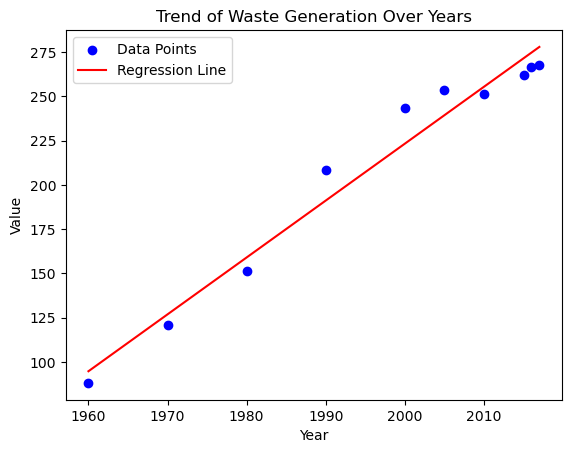

(-6206.842438998433, 3.2150741065964197)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
filtered_data = df2[df2['Type'] == 'Generation']
X_data = filtered_data['year'].values.reshape(-1, 1)
Y_data = filtered_data['Value'].values.reshape(-1, 1)
regression_model = LinearRegression()
regression_model.fit(X_data, Y_data)
Y_data_pred = regression_model.predict(X_data)
plt.scatter(X_data, Y_data, color='blue', label='Data Points')
plt.plot(X_data, Y_data_pred, color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trend of Waste Generation Over Years')
plt.legend()
plt.show()
intercept_data = regression_model.intercept_[0]
slope_data = regression_model.coef_[0][0]
(intercept_data, slope_data)

2.

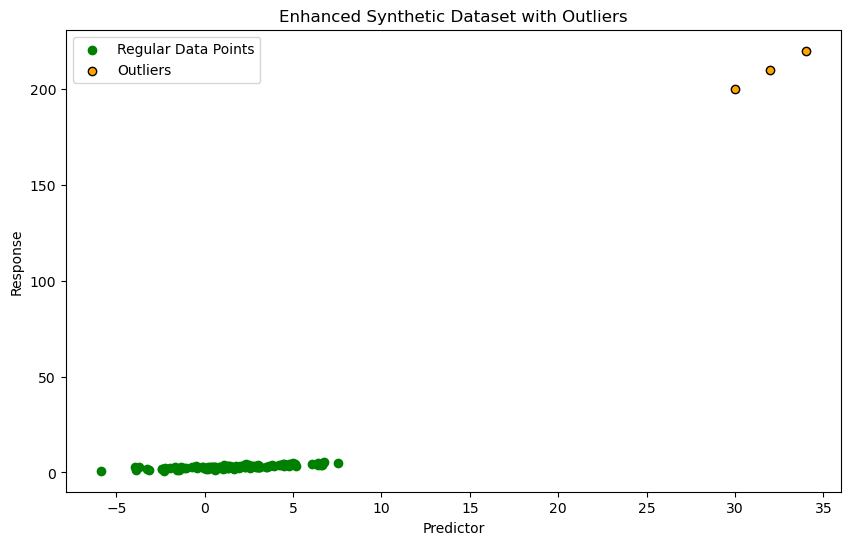

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X_values = 3 * np.random.randn(100, 1) + 2
noise = 0.6 * np.random.randn(100, 1)
Y_values = 2.5 + 0.3 * X_values + noise
outlier_X = np.array([[30], [32], [34]])
outlier_Y = np.array([[200], [210], [220]])
X_with_outliers = np.vstack([X_values, outlier_X])
Y_with_outliers = np.vstack([Y_values, outlier_Y])
plt.figure(figsize=(10, 6))
plt.scatter(X_values, Y_values, color='green', label='Regular Data Points')
plt.scatter(outlier_X, outlier_Y, color='orange', label='Outliers', edgecolors='black')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Enhanced Synthetic Dataset with Outliers')
plt.legend()
plt.show()


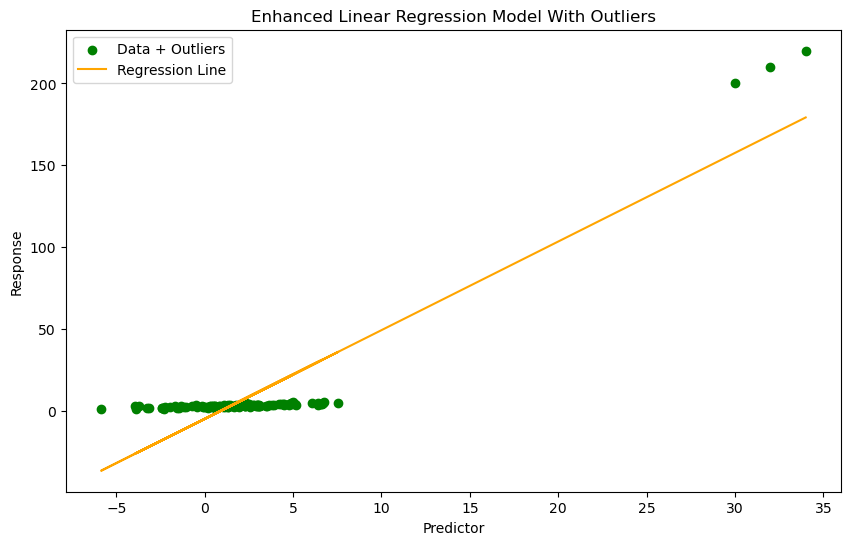

[-4.87464264] [[5.41476948]]


In [35]:
enhanced_model = LinearRegression()
enhanced_model.fit(X_with_outliers, Y_with_outliers)
Y_pred_enhanced = enhanced_model.predict(X_with_outliers)
plt.figure(figsize=(10, 6))
plt.scatter(X_with_outliers, Y_with_outliers, color='green', label='Data + Outliers')
plt.plot(X_with_outliers, Y_pred_enhanced, color='orange', label='Regression Line')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Enhanced Linear Regression Model With Outliers')
plt.legend()
plt.show()

enhanced_intercept, enhanced_coeff = enhanced_model.intercept_, enhanced_model.coef_
print(enhanced_intercept, enhanced_coeff)


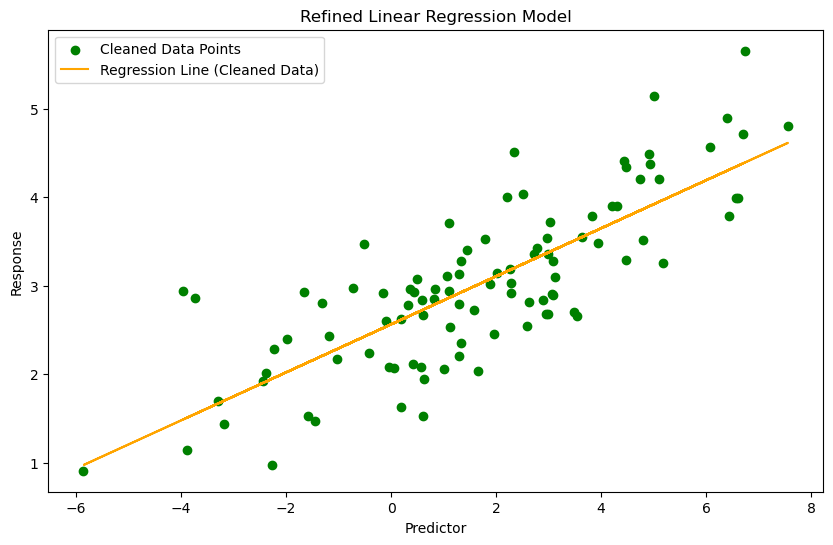

[2.56175956] [[0.27134857]]


In [37]:
refined_model = LinearRegression()
refined_model.fit(X_refined, Y_refined)
Y_pred_refined = refined_model.predict(X_refined)
plt.figure(figsize=(10, 6))
plt.scatter(X_refined, Y_refined, color='green', label='Cleaned Data Points')
plt.plot(X_refined, Y_pred_refined, color='orange', label='Regression Line (Cleaned Data)')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Refined Linear Regression Model')
plt.legend()
plt.show()

refined_intercept, refined_slope = refined_model.intercept_, refined_model.coef_
print(refined_intercept, refined_slope)


3.

In [41]:
from sklearn.metrics import r2_score

sk_model = LinearRegression()
sk_model.fit(X_data, Y_data)

Y_pred_sk = sk_model.predict(X_data)

r_squared_custom = r2_score(Y_data, Y_data_pred)

r_squared_sk = r2_score(Y_data, Y_pred_sk)

intercept_sk, coef_sk = sk_model.intercept_[0], sk_model.coef_[0][0]

comparison_data = {
"Model": ["Custom", "Scikit-learn"],
"Intercept": [-6206.84, intercept_sk],
"Slope": [3.22, coef_sk],
"R-squared": [r_squared_custom, r_squared_sk]
}

comparison_df = pd.DataFrame(comparison_data)

comparison_df

,Model,Intercept,Slope,R-squared
0,Custom,-6206.840000,3.220000,0.967313
1,Scikit-learn,-6206.842439,3.215074,0.967313


4.

In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error


np.random.seed(42)
X_data = 3 * np.random.randn(100, 1) + 2
noise = 0.6 * np.random.randn(100, 1)
Y_data = 2.5 + 0.3 * X_data + noise


custom_alphas = [0.05, 0.5, 5, 50, 500]
custom_alphas_lasso = [0.02, 0.2, 2, 20, 200]

custom_ridge_models = []
custom_lasso_models = []


for custom_alpha, custom_alpha_lasso in zip(custom_alphas, custom_alphas_lasso):  
    custom_ridge = Ridge(alpha=custom_alpha)
    custom_ridge.fit(X_data, Y_data)
    Y_pred_ridge = custom_ridge.predict(X_data)

    custom_lasso = Lasso(alpha=custom_alpha_lasso) 
    custom_lasso.fit(X_data, Y_data)
    Y_pred_lasso = custom_lasso.predict(X_data)

    custom_ridge_models.append((custom_alpha, custom_ridge.coef_[0], custom_ridge.intercept_, r2_score(Y_data, Y_pred_ridge), mean_squared_error(Y_data, Y_pred_ridge)))
    custom_lasso_models.append((custom_alpha_lasso, custom_lasso.coef_[0], custom_lasso.intercept_, r2_score(Y_data, Y_pred_lasso), mean_squared_error(Y_data, Y_pred_lasso))) #use custom_alpha_lasso here


custom_ridge_results_df = pd.DataFrame(custom_ridge_models, columns=['Alpha', 'Slope', 'Intercept', 'R-squared', 'MSE'])
custom_lasso_results_df = pd.DataFrame(custom_lasso_models, columns=['Alpha', 'Slope', 'Intercept', 'R-squared', 'MSE'])


print("Ridge Regression Results:")
print(custom_ridge_results_df)
print("\nLasso Regression Results:")
print(custom_lasso_results_df)

Ridge Regression Results:
    Alpha                  Slope             Intercept  R-squared       MSE
0    0.05  [0.27133010684946324]   [2.561790732857796]   0.629760  0.318108
1    0.50  [0.27116406995348435]  [2.5620710795895345]   0.629760  0.318108
2    5.00  [0.26951480946765316]  [2.5648557906880094]   0.629731  0.318132
3   50.00    [0.254062356438633]  [2.5909466464492708]   0.627204  0.320304
4  500.00  [0.16147928073740173]  [2.7472695079081135]   0.526514  0.406816

Lasso Regression Results:
    Alpha     Slope             Intercept  R-squared       MSE
0    0.02  0.268627   [2.566354825147626]   0.629696  0.318162
1    0.20  0.244133  [2.6077121932336405]   0.623425  0.323551
2    2.00  0.000000    [3.01992088657527]   0.000000  0.859193
3   20.00  0.000000    [3.01992088657527]   0.000000  0.859193
4  200.00  0.000000    [3.01992088657527]   0.000000  0.859193


### Problem 2 ##

**Objective:**


Using the provided heart disease prediction dataset, develop a logistic regression model from scratch and compare it with a model developed using scikit-learn. Evaluate the performance of both models.

**TODO:**


TODO 1: Data Preparation (5 marks)
Load the dataset and perform any necessary preprocessing steps, including handling missing values, encoding categorical variables, and normalizing the data.


TODO 2: Implement Logistic Regression Model from Scratch (15 marks)
Develop a logistic regression model using only numpy or similar basic libraries to predict binary outcomes. Your implementation should focus on the model's prediction capabilities based on provided parameters without delving into the optimization process (gradient descent) for finding these parameters.

**Task Overview:** Recommended to develop the below functions
* Implement the Sigmoid Function: The logistic regression model uses the sigmoid function to map predicted values to probabilities between 0 and 1.

* Model Prediction: Utilize the implemented sigmoid function to predict the probabilities that each instance in the dataset belongs to the positive class (e.g., class labeled "1").

* Threshold Decision: Based on the predicted probabilities, classify each instance by choosing an appropriate threshold (e.g., 0.5) to decide between class "0" and class "1".

* Accuracy Calculation: Implement a function to calculate the accuracy of your model's predictions against the true labels of the dataset.


TODO 3: Implement Logistic Regression Model using scikit-learn (5 marks)
Utilize scikit-learn to implement a logistic regression model. Compare its Accuracy and implementation time against the model from scratch.



1.

In [61]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
data = pd.read_csv('heart_disease_prediction-2.csv')
data.dropna(inplace=True)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            100 non-null    int64
 1   Gender         100 non-null    int64
 2   BloodPressure  100 non-null    int64
 3   Cholesterol    100 non-null    int64
 4   Smoking        100 non-null    int64
 5   HeartDisease   100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB
None


,Age,Gender,BloodPressure,Cholesterol,Smoking,HeartDisease
0,74,1,142,211,0,1
1,77,1,133,235,1,1
2,30,1,177,247,0,1
3,33,0,165,194,1,1
4,33,1,131,184,0,1


In [63]:
missing_values = data.isnull().sum()
print(missing_values)

Age              0
Gender           0
BloodPressure    0
Cholesterol      0
Smoking          0
HeartDisease     0
dtype: int64


In [65]:
cols_to_normalize = ['Age', 'BloodPressure', 'Cholesterol']
data[cols_to_normalize] = MinMaxScaler().fit_transform(data[cols_to_normalize])
data.head()

,Age,Gender,BloodPressure,Cholesterol,Smoking,HeartDisease
0,0.897959,1,0.362069,0.409396,0,1
1,0.959184,1,0.206897,0.570470,1,1
2,0.000000,1,0.965517,0.651007,0,1
3,0.061224,0,0.758621,0.295302,1,1
4,0.061224,1,0.172414,0.228188,0,1


In [67]:
sigmoid_func = lambda z: 1 / (1 + np.exp(-z))
test_inputs = np.array([-10, -1, 0, 1, 10])
sigmoid_values = sigmoid_func(test_inputs)
print(sigmoid_values)

[4.53978687e-05 2.68941421e-01 5.00000000e-01 7.31058579e-01
 9.99954602e-01]


2.

In [114]:
def predict_with_logistic_regression(features, weights, bias):
    z = np.dot(features, weights) + bias
    return sigmoid_func(z)
def make_decision(probabilities, threshold=0.5):
    return (probabilities >= threshold).astype(int)
def calculate_accuracy_score(true_labels, predicted_labels):
    correct_predictions = np.sum(true_labels == predicted_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions
    
np.random.seed(0)
synthetic_weights = np.random.randn(data.shape[1] - 1)
synthetic_bias = np.random.randn()

X_data = data.drop('HeartDisease', axis=1).values
y_data = data['HeartDisease'].values

predicted_probabilities = predict_with_logistic_regression(X_data, synthetic_weights, synthetic_bias) # Corrected function call
predicted_labels = make_decision(predicted_probabilities)
accuracy_score = calculate_accuracy_score(y_data, predicted_labels)

print(accuracy_score)

0.6


3.

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(X_data, y_data)
start_time_custom = time.time()
logistic_reg_custom = LogisticRegression()
logistic_reg_custom.fit(X_train_custom, y_train_custom)
y_pred_custom = logistic_reg_custom.predict(X_test_custom)
accuracy_custom = accuracy_score(y_test_custom, y_pred_custom)
end_time_custom = time.time()
implementation_time_custom = end_time_custom - start_time_custom
accuracy_custom, implementation_time_custom

(0.48, 0.0042607784271240234)

### Problem 3 ##

**Dataset:** [Air Quality](https://archive.ics.uci.edu/ml/datasets/Air+Quality)

**Introduction:** The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

In [118]:
from pandas._libs.algos import diff_2d
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
%matplotlib inline
df4= pd.read_excel("AirQualityUCI.xlsx")
df4.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


**TODO:**
1)Implementing Decision Tree Classifier (7 marks): Implement a decision tree classifier from scratch using Python. Train the classifier on a simple dataset and visualize the decision tree.

2)Visualizing Decision Trees (7 marks): Visualize a decision tree generated by scikit-learn using the plot_tree function. Analyze the structure of the decision tree and interpret its nodes and branches.

3)Hyperparameter Tuning (6 marks): Experiment with different hyperparameters of decision trees (e.g., max_depth, min_samples_split) and analyze their impact on model performance.

4)Interpretability (5 marks): Discuss the interpretability of decision trees compared to other machine learning models. Explain how decision trees make predictions and why they are considered interpretable models.

1.

In [120]:
df4_cleaned = df4.dropna()
co_threshold = df4_cleaned['CO(GT)'].median()
df4_cleaned['Target'] = (df4_cleaned['CO(GT)'] > co_threshold).astype(int)
selected_features = ['NOx(GT)', 'NO2(GT)', 'C6H6(GT)']
X = df4_cleaned[selected_features].values
y = df4_cleaned['Target'].values
df4_cleaned[['CO(GT)'] + selected_features + ['Target']].head()

,CO(GT),NOx(GT),NO2(GT),C6H6(GT),Target
0,2.6,166.0,113.0,11.881723,1
1,2.0,103.0,92.0,9.397165,1
2,2.2,131.0,114.0,8.997817,1
3,2.2,172.0,122.0,9.228796,1
4,1.6,131.0,116.0,6.518224,1


In [126]:
class TreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None): # corrected value parameter
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def calculate_gini(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

def split_dataset(feature, threshold, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[feature] < threshold:
            left.append(row)
        else:
            right.append(row)
    return left, right

def find_best_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    best_feature, best_threshold, best_score, best_groups = 999, 999, 999, None
    for feature in range(len(dataset[0]) - 1):
        for row in dataset:
            groups = split_dataset(feature, row[feature], dataset)
            gini = calculate_gini(groups, class_values)
            if gini < best_score:
                best_feature, best_threshold, best_score, best_groups = feature, row[feature], gini, groups # corrected best_threshold and gini assignment
    return {'feature': best_feature, 'threshold': best_threshold, 'groups': best_groups} # corrected dictionary key

def create_terminal_node(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

def recursively_split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del node['groups']
    if not left or not right:
        node['left'] = node['right'] = create_terminal_node(left + right)
        return
    if depth >= max_depth:
        node['left'], node['right'] = create_terminal_node(left), create_terminal_node(right) # corrected node['right'] assignment
        return
    if len(left) <= min_size:
        node['left'] = create_terminal_node(left)
    else:
        node['left'] = find_best_split(left)
        recursively_split(node['left'], max_depth, min_size, depth + 1)
    if len(right) <= min_size:
        node['right'] = create_terminal_node(right)
    else:
        node['right'] = find_best_split(right)
        recursively_split(node['right'], max_depth, min_size, depth + 1)

def build_decision_tree(train, max_depth, min_size):
    root = find_best_split(train)
    recursively_split(root, max_depth, min_size, 1)
    return root

def print_decision_tree(node, depth=0):
    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth * ' ', (node['feature'] + 1), node['threshold'])))
        print_decision_tree(node['left'], depth + 1)
        print_decision_tree(node['right'], depth + 1)
    else:
        print('%s[%s]' % ((depth * ' ', node)))

In [132]:
import pandas as pd
import numpy as np

prepared_dataset = np.column_stack((X, y)).tolist()
max_tree_depth = 3
min_leaf_size = 10
decision_tree = build_decision_tree(prepared_dataset, max_tree_depth, min_leaf_size)
print_decision_tree(decision_tree)

[X2 < 86.900]
 [X1 < 194.000]
  [X3 < 7.270]
   [0.0]
   [0.0]
  [X3 < 7.434]
   [0.0]
   [1.0]
 [X3 < 7.282]
  [X1 < 239.500]
   [0.0]
   [1.0]
  [X1 < 118.000]
   [1.0]
   [1.0]


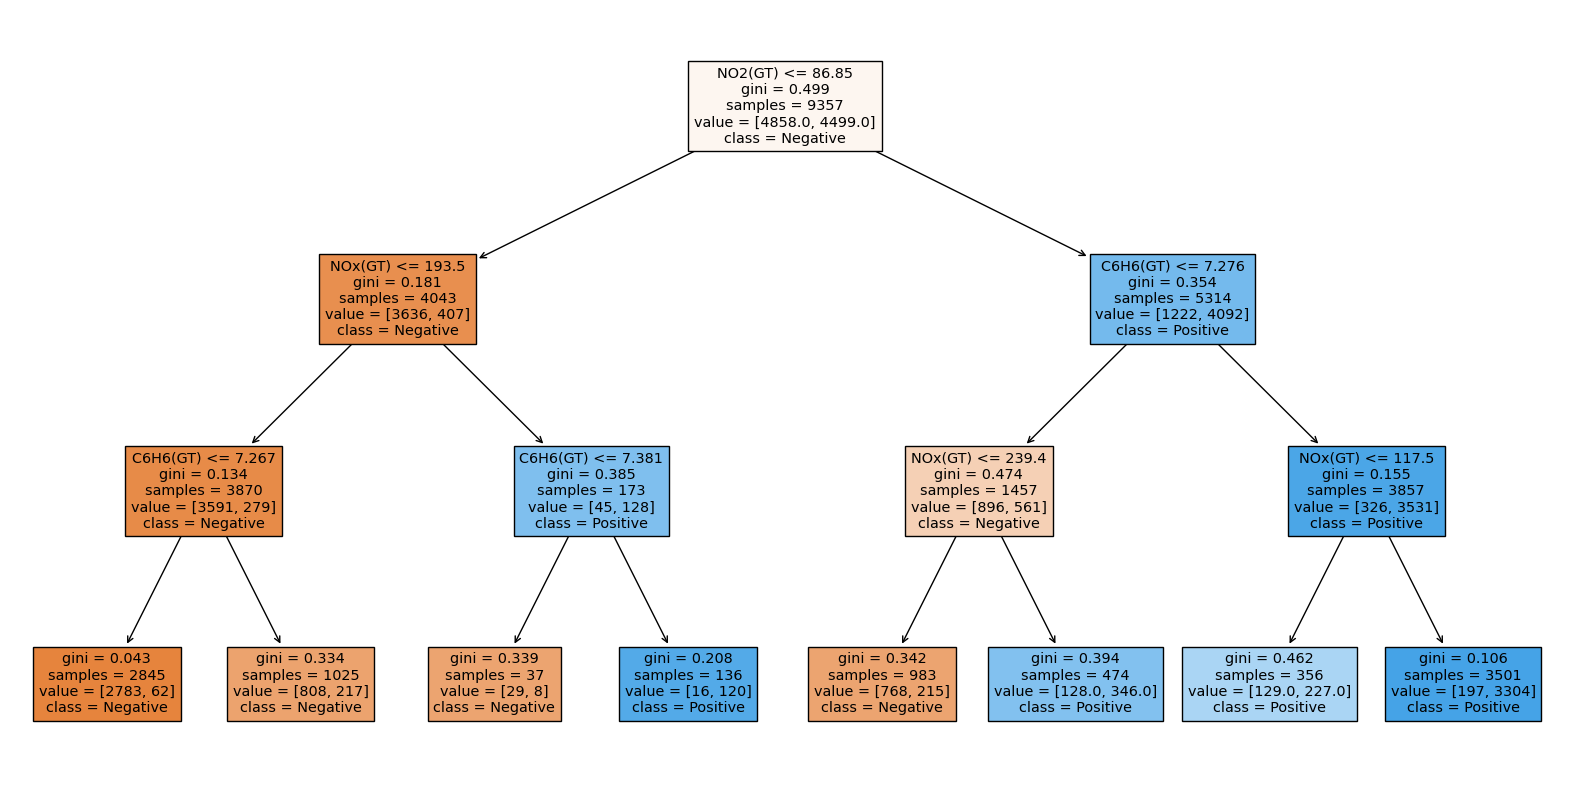

In [138]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=selected_features, class_names=['Negative', 'Positive']) 
plt.show()

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd  

max_depth_options = [None, 3, 5, 7, 9]
min_samples_split_options = [2, 10, 20, 30, 40]
depth_split_scores = []

for depth in max_depth_options:
    for split_value in min_samples_split_options:
        model = DecisionTreeClassifier(max_depth=depth, min_samples_split=split_value)  
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        depth_split_scores.append((depth, split_value, np.mean(scores)))

depth_split_scores_df = pd.DataFrame(depth_split_scores, columns=['Max Depth', 'Min Samples Split', 'Mean Accuracy'])  
print(depth_split_scores_df)

    Max Depth  Min Samples Split  Mean Accuracy
0         NaN                  2       0.839479
1         NaN                 10       0.843327
2         NaN                 20       0.850274
3         NaN                 30       0.855510
4         NaN                 40       0.857540
5         3.0                  2       0.881270
6         3.0                 10       0.881270
7         3.0                 20       0.881270
8         3.0                 30       0.881270
9         3.0                 40       0.881270
10        5.0                  2       0.893986
11        5.0                 10       0.893986
12        5.0                 20       0.893986
13        5.0                 30       0.893986
14        5.0                 40       0.893986
15        7.0                  2       0.879771
16        7.0                 10       0.875709
17        7.0                 20       0.877311
18        7.0                 30       0.875388
19        7.0                 40       0

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

# Assuming X and y are defined from your data preprocessing steps.
# ... (your code to load and preprocess X and y) ...

min_samples_split_options = [2, 10, 20, 30, 40]
split_scores = []

for split_value in min_samples_split_options:
    model = DecisionTreeClassifier(min_samples_split=split_value, random_state=42)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    split_scores.append((split_value, np.mean(scores)))

split_scores_df = pd.DataFrame(split_scores, columns=['Min Samples Split', 'Accuracy']) #Corrected column name
print(split_scores_df)

   Min Samples Split  Accuracy
0                  2  0.840654
1                 10  0.846748
2                 20  0.852946
3                 30  0.854442
4                 40  0.858822


Interpretability is a crucial aspect in machine learning models, especially in scenarios where understanding
the reasoning behind predictions is essential. Decision trees offer a distinct advantage in interpretability
compared to many other machine learning models.

Decision trees make predictions by recursively partitioning the feature space into regions, where each
region corresponds to a specific prediction. At each node of the tree, a decision is made based on a feature
and a threshold value, effectively splitting the data into two or more subsets. This process continues
recursively until a stopping criterion is met, such as reaching a maximum depth, having minimum samples
per split, or achieving purity in the leaf nodes.

Here are some key reasons why decision trees are considered interpretable models:

1. Human-readable structure: The structure of a decision tree is inherently understandable, resembling a
flowchart with decision nodes and leaf nodes. Each decision node represents a feature and a threshold
value, indicating a condition for splitting the data, while leaf nodes represent the predicted outcome.

2. Transparent decision-making process: Decision trees follow a transparent decision-making process,
where each decision rule can be traced back from the root node to the leaf nodes. This transparency
allows stakeholders to understand why a particular prediction was made.

3. Feature importance: Decision trees provide insights into feature importance by evaluating which
features contribute the most to the decision-making process. Features that appear near the top of the
tree or are frequently used for splitting are considered more important.

4. No complex mathematical transformations: Unlike some other models such as neural networks or
support vector machines, decision trees do not involve complex mathematical transformations of the
input features. This simplicity contributes to their interpretability as there are no "black-box"
transformations involved.

5. Easily visualized: Decision trees can be visualized graphically, enabling easy interpretation and
communication of the model's logic to stakeholders. Tools like plot_tree in scikit-learn provide
visual representations of decision trees, further enhancing their interpretability.

### Problem 4

**Dataset:** [Wine Classification Dataset](https://archive.ics.uci.edu/ml/datasets/wine)

**Introduction:** These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


In [154]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
np.set_printoptions(suppress=True, precision=8)

wine = load_wine()
df5 = pd.DataFrame(wine['data'], columns=wine['feature_names'])
y = wine['target']

In [158]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [160]:
from ucimlrepo import fetch_ucirepo

wine = fetch_ucirepo(id=109)

X = wine.data.features
y = wine.data.targets
 
print(wine.metadata)
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

**TODO:**
1)Training Random Forest Classifier (8 marks): Train a random forest classifier using scikit-learn for a classification task. Experiment with different hyperparameters such as the number of trees and max_features.

2)Performance Comparison (7 marks): Compare the performance of the random forest classifier with a single decision tree on a benchmark dataset. Analyze the differences in accuracy, precision, and recall between the two models.

3)Feature Importance (6 marks): Investigate feature importance measures (e.g., Gini impurity, mean decrease impurity) in random forests. Identify the most important features and discuss their relevance to the target variable.

4)Variant Implementation (4 marks): Implement a variant of the random forest algorithm (e.g., Extremely Randomized Trees, Gradient Boosted Trees) using a third-party library or custom implementation. Evaluate its performance and compare it with the standard random forest.







1.

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42  
)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [168]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_features='sqrt')
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


2.

In [170]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
print("Performance Metrics for Decision Tree:")
print("Accuracy:", accuracy_decision_tree)
print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)
print("\nPerformance Metrics for Random Forest:")
print("Accuracy:", accuracy_random_forest)
print("Precision:", precision_random_forest)
print("Recall:", recall_random_forest)

Performance Metrics for Decision Tree:
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394

Performance Metrics for Random Forest:
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465


3.

Feature Importances:
mean radius: 0.034843233980943286
mean texture: 0.015225145712914773
mean perimeter: 0.06799034063826767
mean area: 0.0604616365111208
mean smoothness: 0.0079584528113981
mean compactness: 0.0115970382551153
mean concavity: 0.06691736463414075
mean concave points: 0.10704565721708294
mean symmetry: 0.0034227883667066654
mean fractal dimension: 0.0026150761617340355
radius error: 0.014263704023561991
texture error: 0.0037442655277211308
perimeter error: 0.010085060356218195
area error: 0.029552828963121246
smoothness error: 0.0047215698751171715
compactness error: 0.00561183426078747
concavity error: 0.005819693803295157
concave points error: 0.003759747669641929
symmetry error: 0.003545970882211008
fractal dimension error: 0.005942332118800315
worst radius: 0.08284828183729644
worst texture: 0.017485260960677165
worst perimeter: 0.08084969717184526
worst area: 0.13935694286788813
worst smoothness: 0.012232023199117627
worst compactness: 0.01986385650955019
worst co

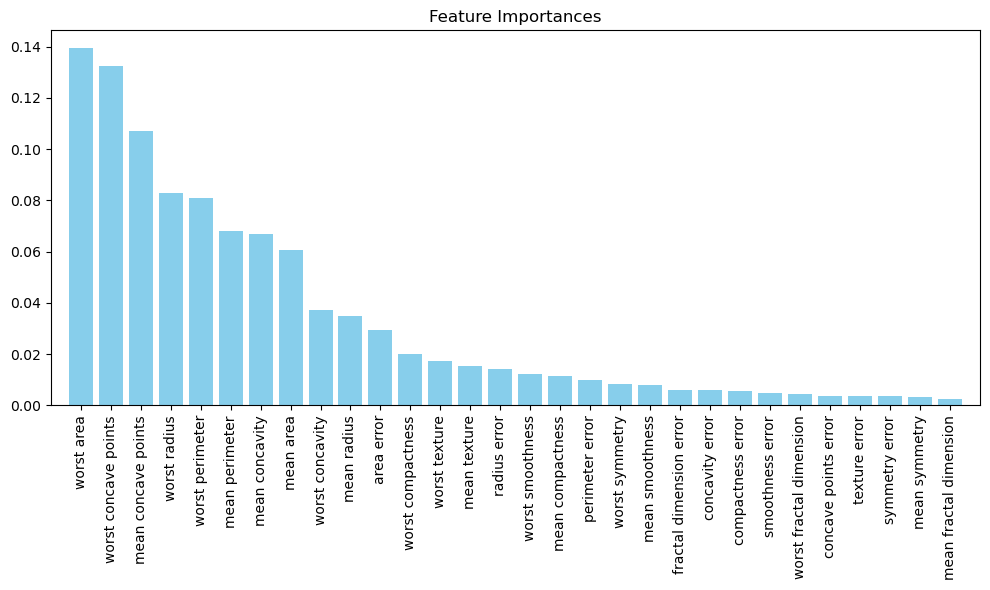

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)

importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature Importances:")
for i in range(len(feature_names)):
    print(f"{feature_names[i]}: {importances[i]}")
    
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [180]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

et_classifier = ExtraTreesClassifier(random_state=42)
et_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
y_pred_et = et_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

accuracy_et = accuracy_score(y_test, y_pred_et)

print("Performance Comparison:")
print("Random Forest Accuracy:", accuracy_rf)
print("Extra Trees Accuracy:", accuracy_et)

Performance Comparison:
Random Forest Accuracy: 0.9649122807017544
Extra Trees Accuracy: 0.9649122807017544
